In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('NEP.csv')
df2=pd.read_csv('tokyo.csv')
df3=pd.read_csv('SUS_tweets.csv')
df4=pd.read_csv('covid19_tweets.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_8188\1585486630.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('tokyo.csv')


In [3]:
df2.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45.0,39.0,293.0,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0.0,0.0,False
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235.0,5.0,2969.0,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0.0,0.0,False
2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646.0,3.0,5.0,False,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android,0.0,1.0,False
3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975.0,2724.0,36554.0,True,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App,1.0,0.0,False
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6.0,37.0,31.0,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False


In [4]:
df2['text'] = df2['text'].astype(str)
df2['text'] = df2['text'].fillna('')

In [5]:
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load your dataset
 # Load your dataset here

# Define a function to remove stopwords and punctuation
def clean_text(text):
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove punctuation
    words = [word for word in words if word.isalnum()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    
    return ' '.join(words)

# Apply the function to your DataFrame
df['cleaned_text'] = df['Tweet'].apply(clean_text)
df2['cleaned_text']= df2['text'].apply(clean_text)
df3['cleaned_text']= df3['message'].apply(clean_text)
df4['cleaned_text']= df4['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from keybert import KeyBERT

In [34]:
model = KeyBERT(model="distilbert-base-nli-mean-tokens")  # Choose the model you prefer
keywords = model.extract_keywords(df['cleaned_text'][:10])
keywords2 = model.extract_keywords(df2['cleaned_text'][:10])
keywords3 = model.extract_keywords(df3['cleaned_text'][:10])
keywords4 = model.extract_keywords(df4['cleaned_text'][:10])

In [35]:
print("NEP : ",keywords[:20])
print("\n")
print("TOKYO: ",keywords2[:10],end="\n")

NEP :  [[('tamilnadu', 0.3022), ('education', 0.2944), ('progressive', 0.2927), ('india', 0.2565), ('nep2020', 0.2526)], [('footballindex', 0.5979), ('happyexolday', 0.4602), ('hellostrangerep6', 0.3227), ('galaxyunpacked', 0.3059), ('nep2020', 0.2647)], [('exams', 0.302), ('nep2020', 0.2177), ('cbseindia29', 0.2098), ('new', 0.2097), ('learning', 0.1803)], [('nep2020', 0.2386), ('2019', 0.2382), ('darshana1996', 0.164), ('revisions', 0.0899), ('66', 0.0803)], [('nursing', 0.3686), ('nep2020', 0.3248), ('nejournalonline', 0.2733), ('daily', 0.2696), ('latest', 0.2682)], [('2020', 0.314), ('upgrading', 0.2314), ('nep2020', 0.2311), ('rajnathsingh', 0.1704), ('degrees', 0.1619)], [('neweducationpolicy2020', 0.4607), ('koreanculture', 0.4196), ('nep2020', 0.3185), ('kculturelko', 0.2757), ('6th', 0.2369)], [('mafia', 0.2371), ('university', 0.1339), ('medical', 0.1134), ('biggest', 0.1015), ('professional', 0.0775)], [('bollywood', 0.6448), ('urdu', 0.5882), ('hindi', 0.5469), ('nep2020',

In [25]:
print("Suspacious tweets: ",keywords3[:10],end="\n")
print("\n")
print("Covid19 tweets:",keywords4[:10],end="\n")

Suspacious tweets:  [[('switchfoot', 0.3499), ('david', 0.3448), ('http', 0.3282), ('bummer', 0.2341), ('carr', 0.2277)], [('facebook', 0.4849), ('texting', 0.3973), ('upset', 0.2519), ('update', 0.1522), ('school', 0.1355)], [('50', 0.2962), ('dived', 0.2737), ('ball', 0.2052), ('kenichan', 0.0985), ('bounds', 0.0703)], [('itchy', 0.6872), ('feels', 0.443), ('body', 0.4419), ('like', 0.3964)], [('nationwideclass', 0.7262), ('mad', 0.6603), ('behaving', 0.5192), ('ca', 0.4564)], [('kwesidei', 0.669), ('crew', 0.6574)], [('hug', 0.8851), ('need', 0.7672)], [('rains', 0.639), ('long', 0.5129), ('thanks', 0.4855), ('loltrish', 0.4358), ('fine', 0.4265)], [('nope', 1.0)], [('twittera', 0.893), ('muera', 0.6864), ('que', 0.6809)]]


Covid19 tweets: [[('intoxicated', 0.6117), ('smelled', 0.5277), ('scent', 0.5257), ('sanitizers', 0.4378), ('https', 0.2836)], [('yankeespr', 0.5869), ('mlb', 0.5846), ('yankees', 0.5382), ('respects', 0.2912), ('pay', 0.2294)], [('trump', 0.4708), ('realdonaldt

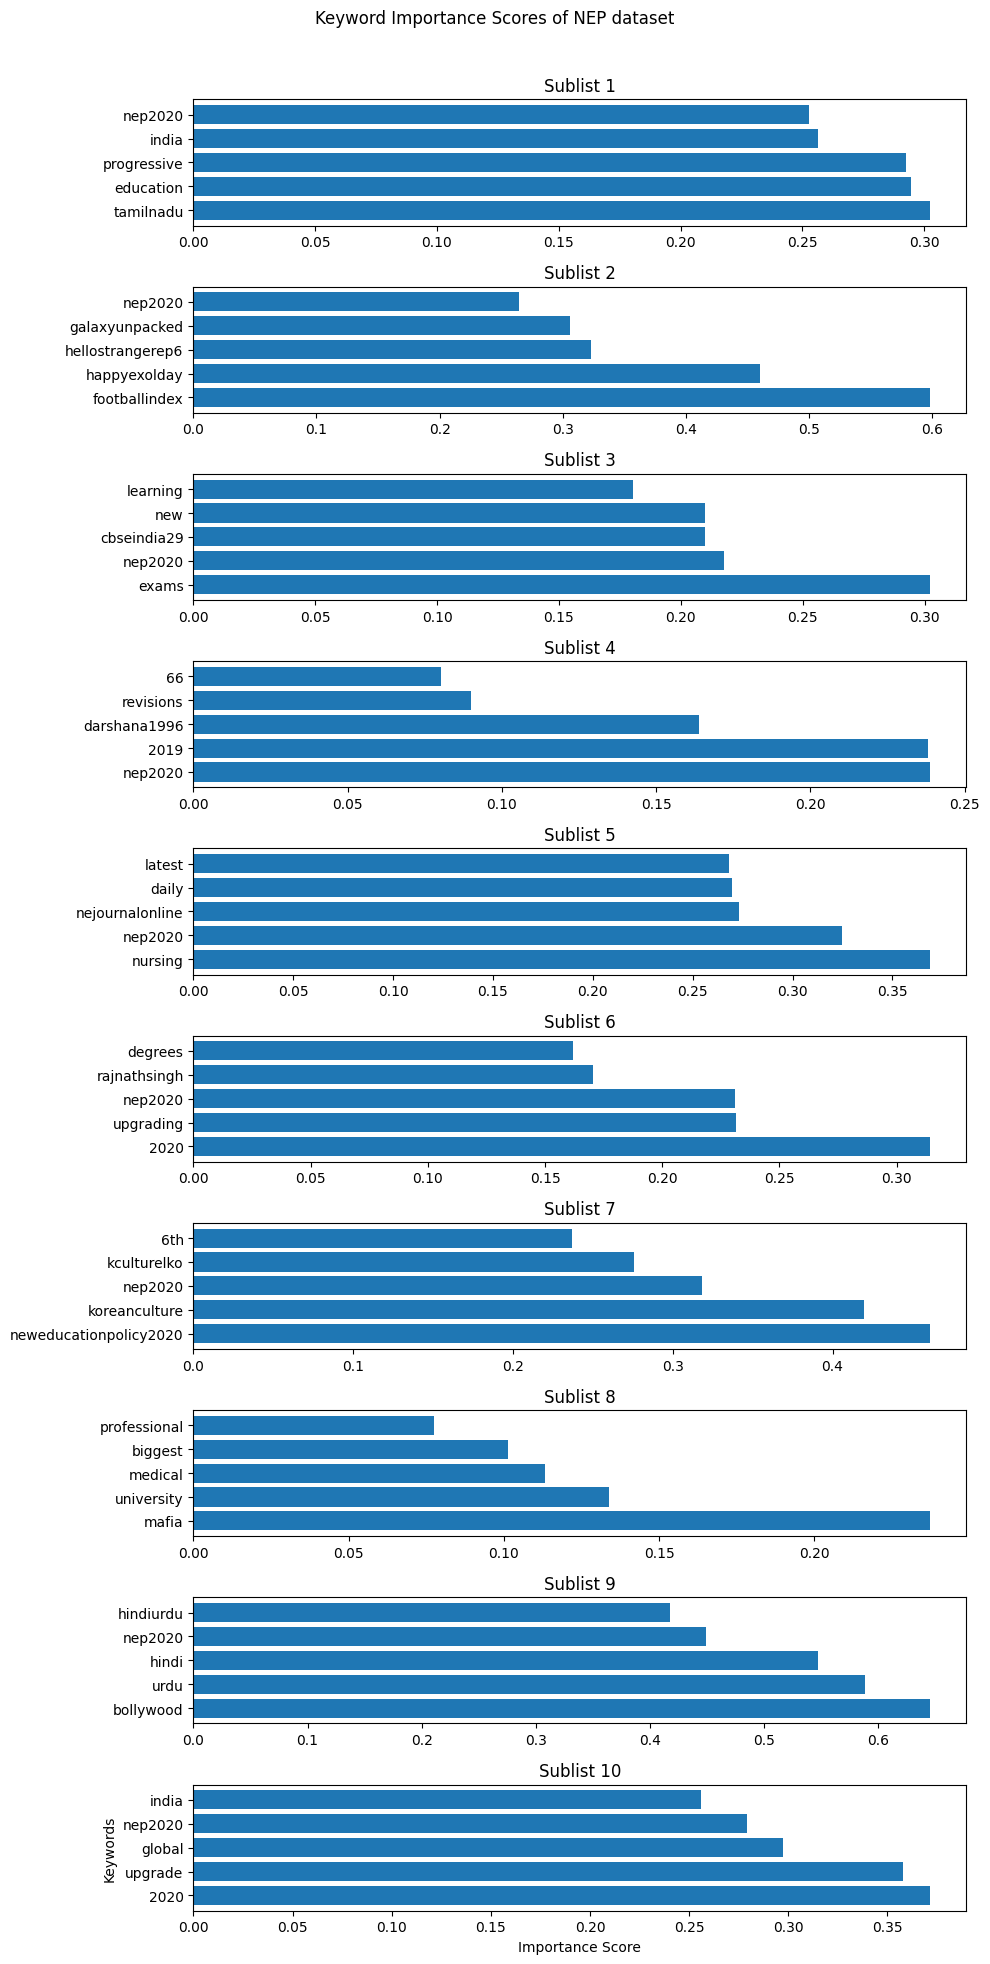

In [58]:
import matplotlib.pyplot as plt

# The data you provided
data =[[('tamilnadu', 0.3022), ('education', 0.2944), ('progressive', 0.2927), ('india', 0.2565), ('nep2020', 0.2526)], [('footballindex', 0.5979), ('happyexolday', 0.4602), ('hellostrangerep6', 0.3227), ('galaxyunpacked', 0.3059), ('nep2020', 0.2647)], [('exams', 0.302), ('nep2020', 0.2177), ('cbseindia29', 0.2098), ('new', 0.2097), ('learning', 0.1803)], [('nep2020', 0.2386), ('2019', 0.2382), ('darshana1996', 0.164), ('revisions', 0.0899), ('66', 0.0803)], [('nursing', 0.3686), ('nep2020', 0.3248), ('nejournalonline', 0.2733), ('daily', 0.2696), ('latest', 0.2682)], [('2020', 0.314), ('upgrading', 0.2314), ('nep2020', 0.2311), ('rajnathsingh', 0.1704), ('degrees', 0.1619)], [('neweducationpolicy2020', 0.4607), ('koreanculture', 0.4196), ('nep2020', 0.3185), ('kculturelko', 0.2757), ('6th', 0.2369)], [('mafia', 0.2371), ('university', 0.1339), ('medical', 0.1134), ('biggest', 0.1015), ('professional', 0.0775)], [('bollywood', 0.6448), ('urdu', 0.5882), ('hindi', 0.5469), ('nep2020', 0.4494), ('hindiurdu', 0.4178)], [('2020', 0.3712), ('upgrade', 0.3576), ('global', 0.2971), ('nep2020', 0.2793), ('india', 0.2562)]]

# Extract the keywords and scores for each sublist in data
keywords_lists = []
scores_lists = []

for sublist in data:
    keywords, scores = zip(*sublist)
    keywords_lists.append(keywords)
    scores_lists.append(scores)

# Create subplots
fig, axs = plt.subplots(len(data), figsize=(10, 2 * len(data)))

# Plot each sublist
for i in range(len(data)):
    axs[i].barh(keywords_lists[i], scores_lists[i])
    axs[i].set_title(f'Sublist {i + 1}')

# Add labels and titles
plt.xlabel('Importance Score')
plt.ylabel('Keywords')
plt.suptitle('Keyword Importance Scores of NEP dataset')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


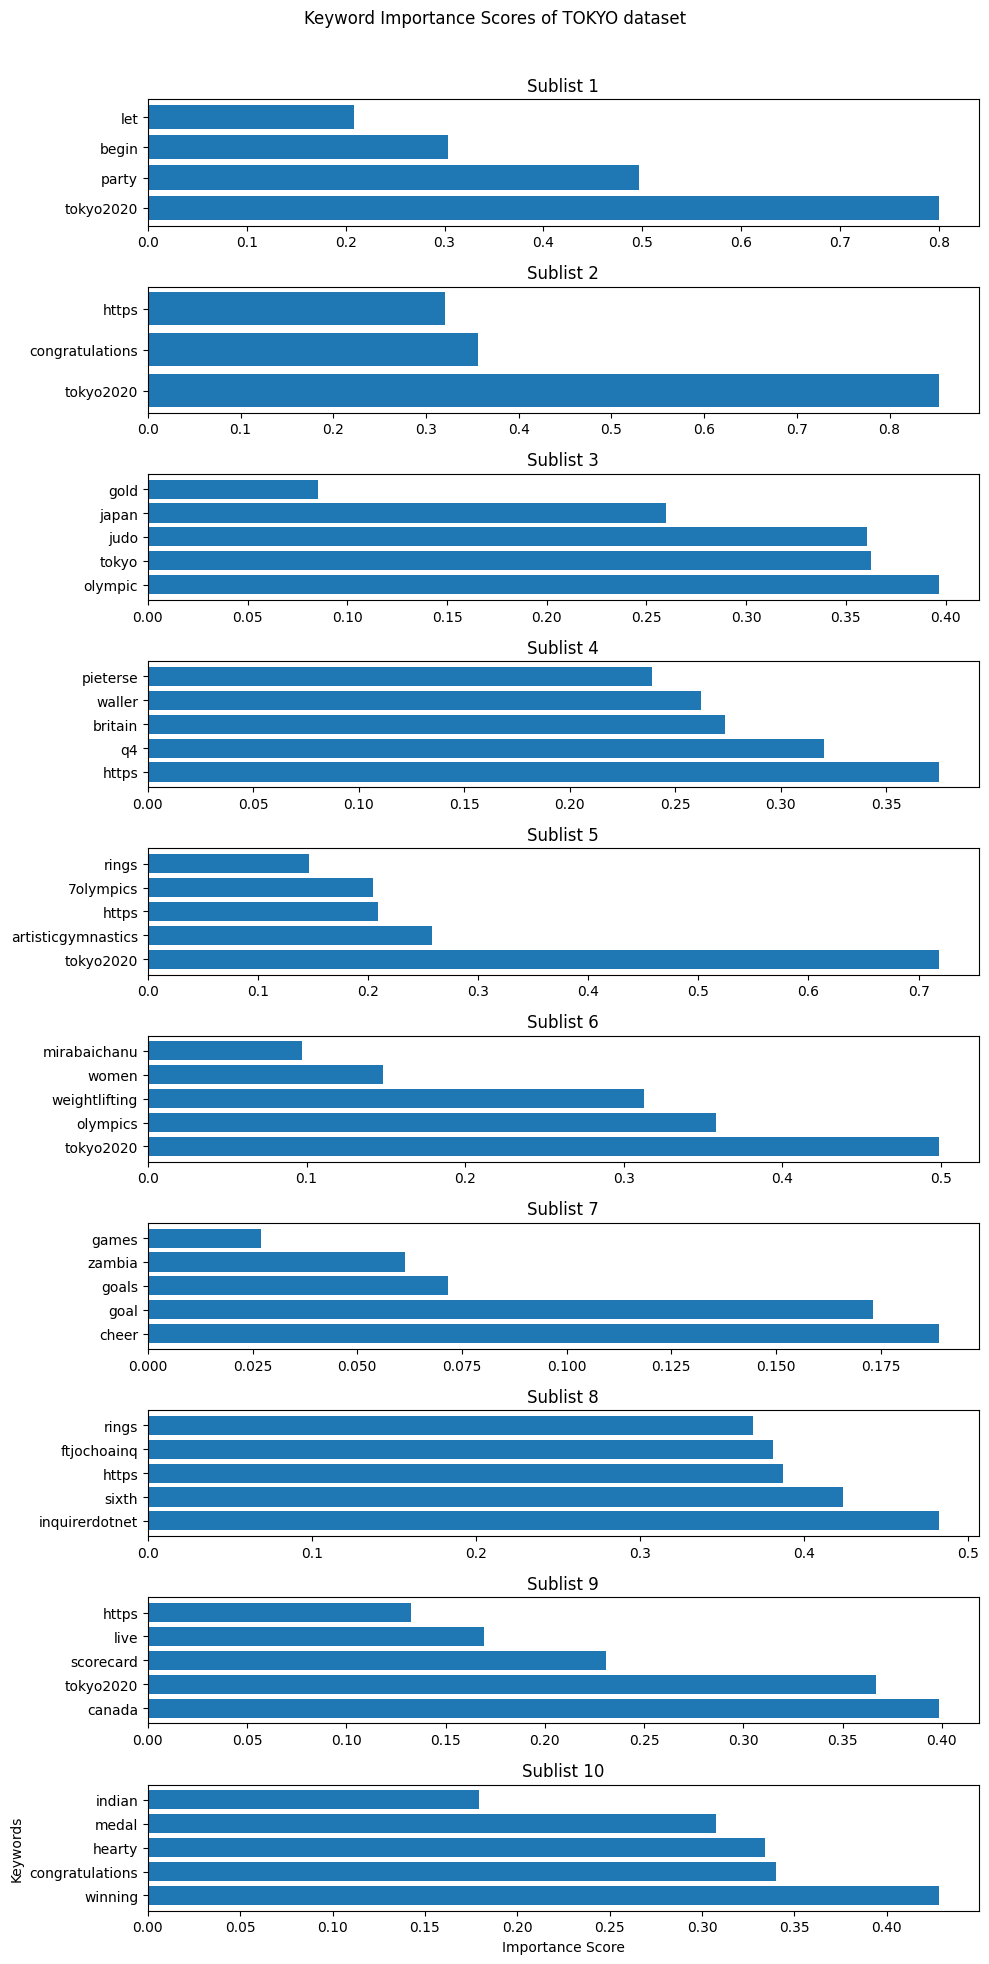

In [59]:
import matplotlib.pyplot as plt

# The data you provided
TOKYO= [[('tokyo2020', 0.8002), ('party', 0.4971), ('begin', 0.3033), ('let', 0.2087)], [('tokyo2020', 0.8535), ('congratulations', 0.3563), ('https', 0.3207)], [('olympic', 0.3968), ('tokyo', 0.3625), ('judo', 0.3607), ('japan', 0.2597), ('gold', 0.0853)], [('https', 0.3752), ('q4', 0.3204), ('britain', 0.2737), ('waller', 0.2623), ('pieterse', 0.2392)], [('tokyo2020', 0.7187), ('artisticgymnastics', 0.2577), ('https', 0.209), ('7olympics', 0.2041), ('rings', 0.1462)], [('tokyo2020', 0.4989), ('olympics', 0.3583), ('weightlifting', 0.3129), ('women', 0.1481), ('mirabaichanu', 0.0973)], [('cheer', 0.189), ('goal', 0.1731), ('goals', 0.0718), ('zambia', 0.0615), ('games', 0.027)], [('inquirerdotnet', 0.4822), ('sixth', 0.4239), ('https', 0.3873), ('ftjochoainq', 0.3808), ('rings', 0.369)], [('canada', 0.3986), ('tokyo2020', 0.367), ('scorecard', 0.2309), ('live', 0.1694), ('https', 0.1326)], [('winning', 0.4284), ('congratulations', 0.3399), ('hearty', 0.3339), ('medal', 0.3077), ('indian', 0.1795)]]
keywords_lists = []
scores_lists = []

for sublist in TOKYO:
    keywords, scores = zip(*sublist)
    keywords_lists.append(keywords)
    scores_lists.append(scores)

# Create subplots
fig, axs = plt.subplots(len(TOKYO), figsize=(10, 2 * len(TOKYO)))

# Plot each sublist
for i in range(len(TOKYO)):
    axs[i].barh(keywords_lists[i], scores_lists[i])
    axs[i].set_title(f'Sublist {i + 1}')

# Add labels and titles
plt.xlabel('Importance Score')
plt.ylabel('Keywords')
plt.suptitle('Keyword Importance Scores of TOKYO dataset')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


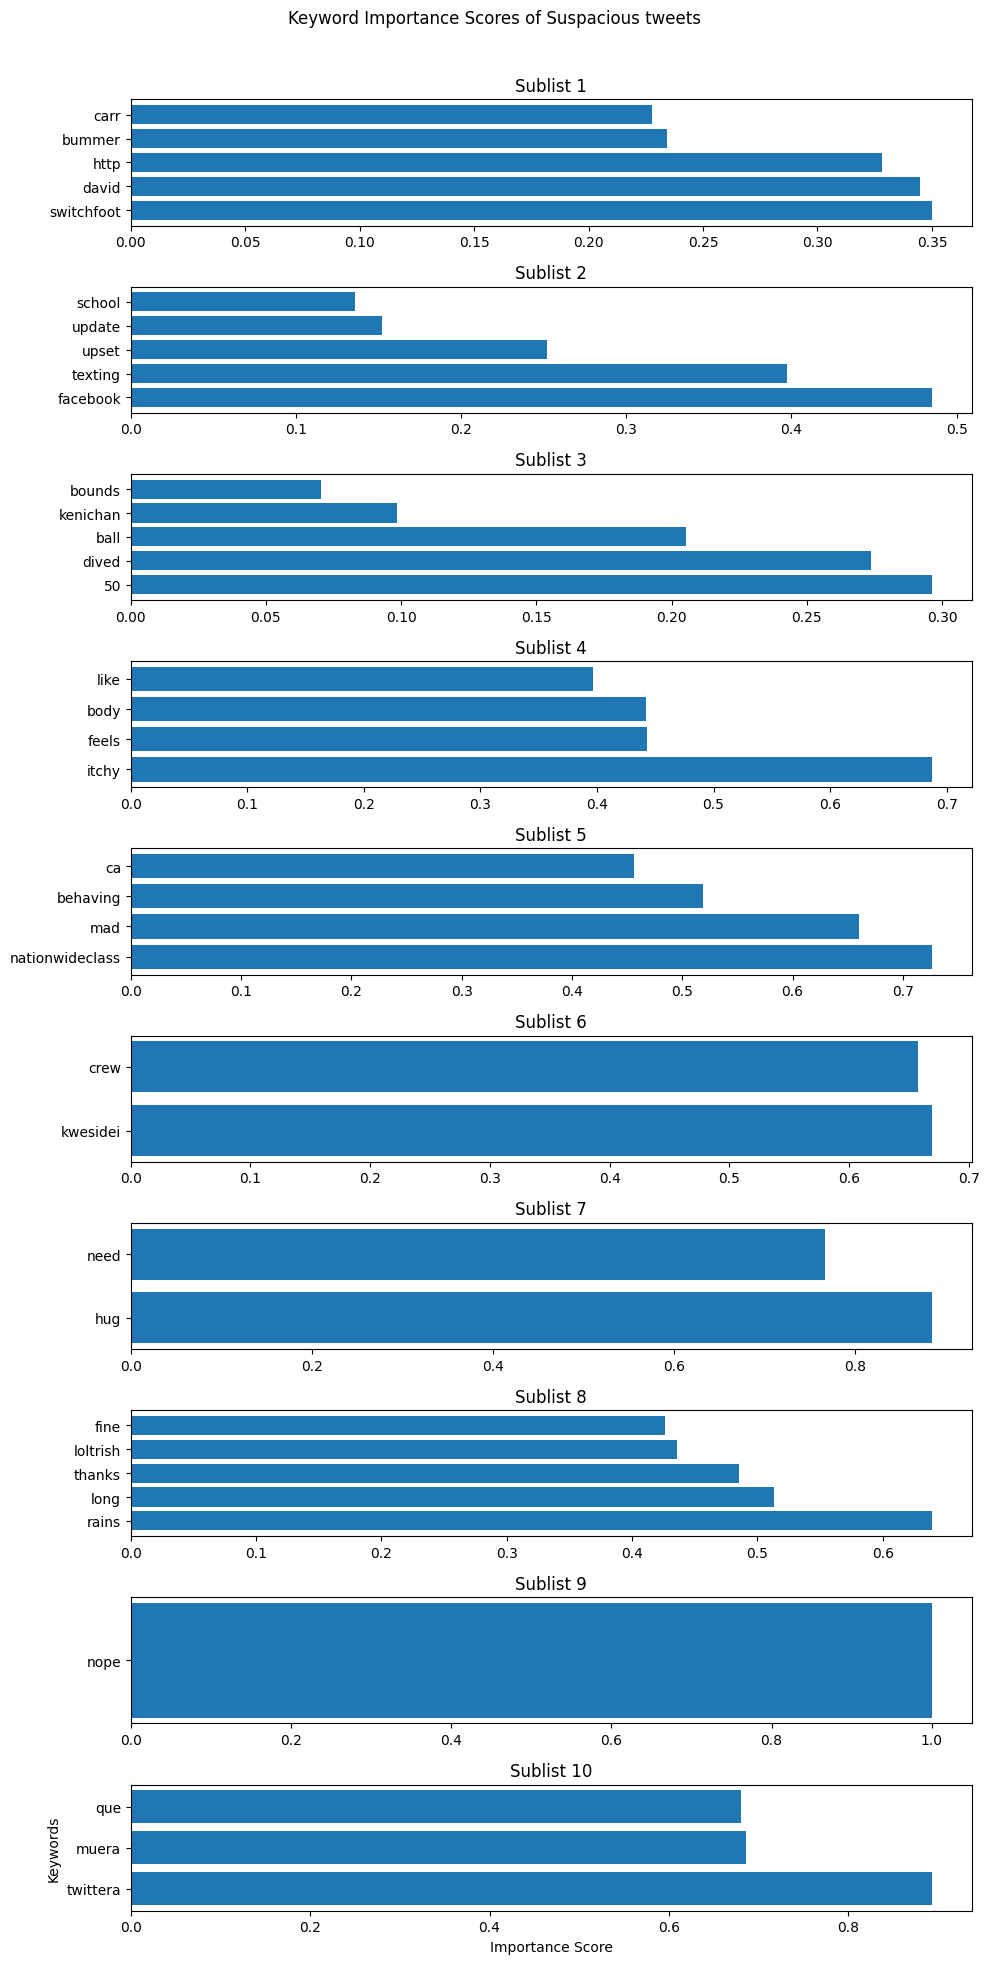

In [60]:
import matplotlib.pyplot as plt

# The data you provided
Sus_tweets= [[('switchfoot', 0.3499), ('david', 0.3448), ('http', 0.3282), ('bummer', 0.2341), ('carr', 0.2277)], [('facebook', 0.4849), ('texting', 0.3973), ('upset', 0.2519), ('update', 0.1522), ('school', 0.1355)], [('50', 0.2962), ('dived', 0.2737), ('ball', 0.2052), ('kenichan', 0.0985), ('bounds', 0.0703)], [('itchy', 0.6872), ('feels', 0.443), ('body', 0.4419), ('like', 0.3964)], [('nationwideclass', 0.7262), ('mad', 0.6603), ('behaving', 0.5192), ('ca', 0.4564)], [('kwesidei', 0.669), ('crew', 0.6574)], [('hug', 0.8851), ('need', 0.7672)], [('rains', 0.639), ('long', 0.5129), ('thanks', 0.4855), ('loltrish', 0.4358), ('fine', 0.4265)], [('nope', 1.0)], [('twittera', 0.893), ('muera', 0.6864), ('que', 0.6809)]]

keywords_lists = []
scores_lists = []

for sublist in Sus_tweets:
    keywords, scores = zip(*sublist)
    keywords_lists.append(keywords)
    scores_lists.append(scores)

# Create subplots
fig, axs = plt.subplots(len(Sus_tweets), figsize=(10, 2 * len(Sus_tweets)))

# Plot each sublist
for i in range(len(Sus_tweets)):
    axs[i].barh(keywords_lists[i], scores_lists[i])
    axs[i].set_title(f'Sublist {i + 1}')

# Add labels and titles
plt.xlabel('Importance Score')
plt.ylabel('Keywords')
plt.suptitle('Keyword Importance Scores of Suspacious tweets')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


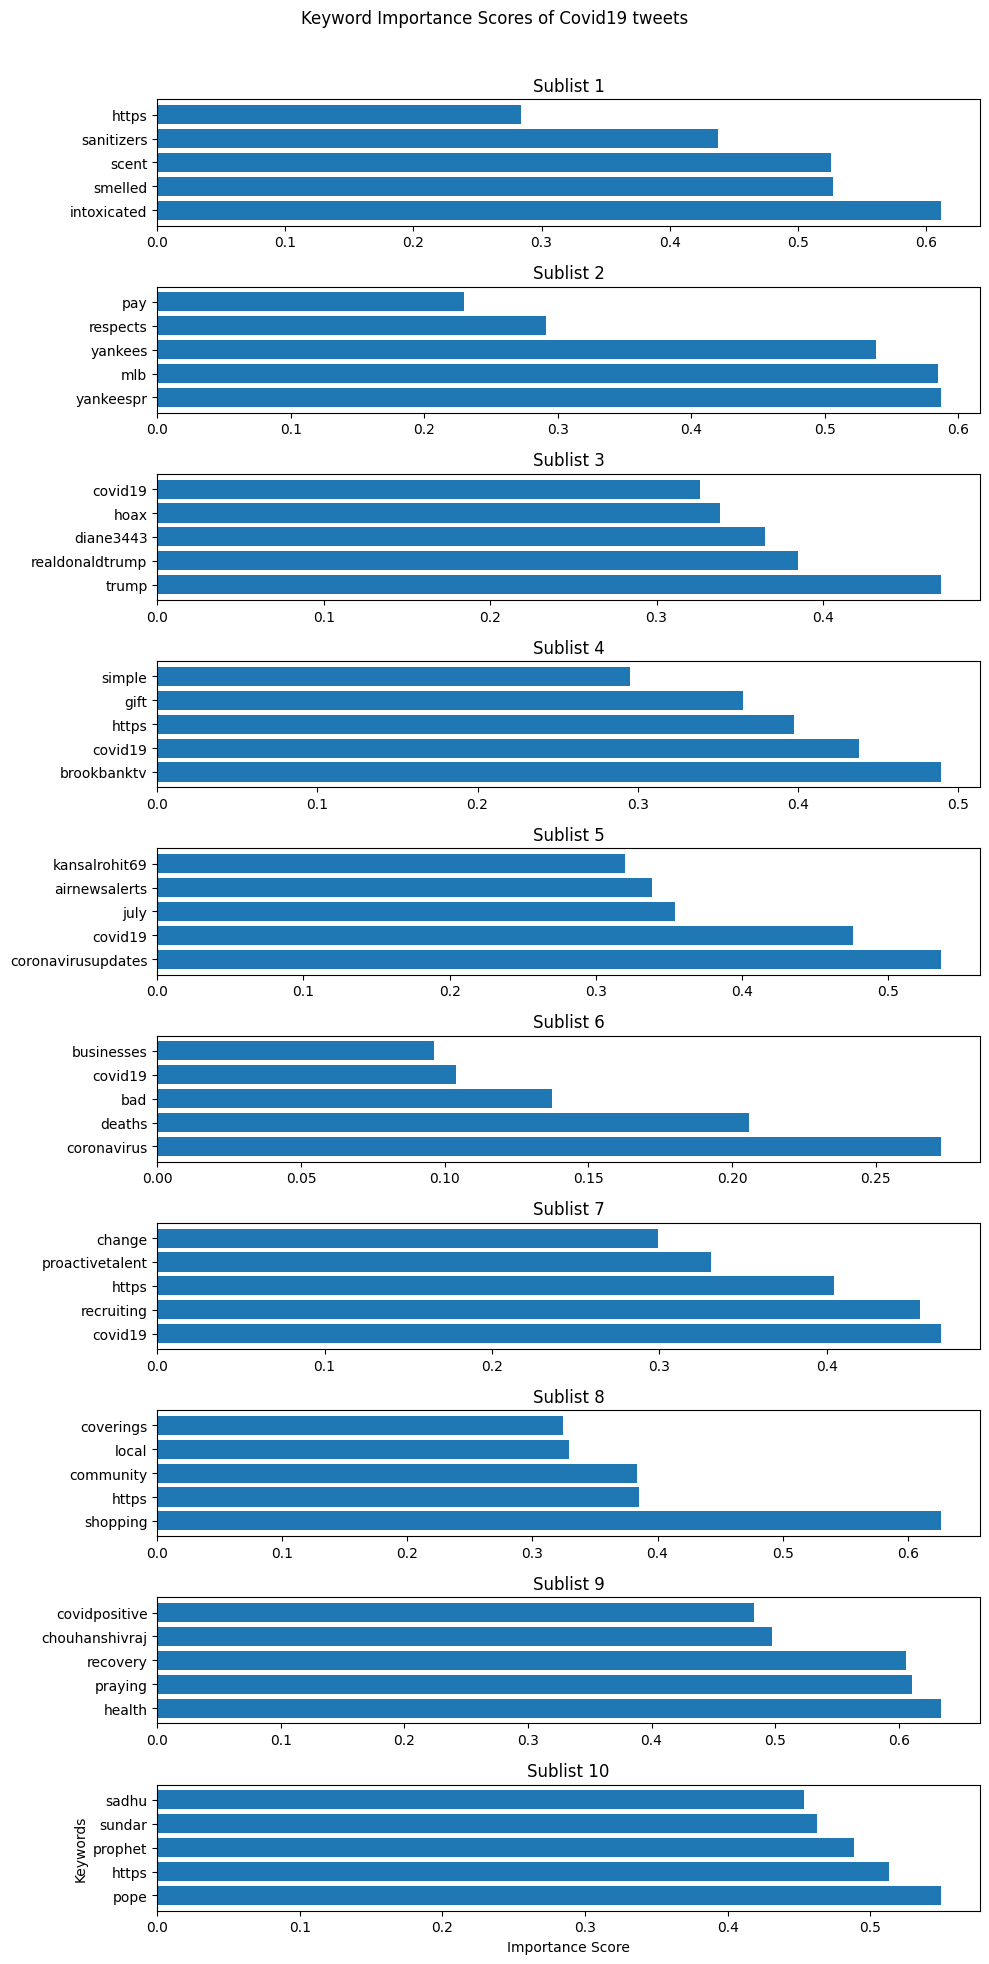

In [61]:
import matplotlib.pyplot as plt

# The data you provided
Covid_tweets= [[('intoxicated', 0.6117), ('smelled', 0.5277), ('scent', 0.5257), ('sanitizers', 0.4378), ('https', 0.2836)], [('yankeespr', 0.5869), ('mlb', 0.5846), ('yankees', 0.5382), ('respects', 0.2912), ('pay', 0.2294)], [('trump', 0.4708), ('realdonaldtrump', 0.3848), ('diane3443', 0.3651), ('hoax', 0.3384), ('covid19', 0.3263)], [('brookbanktv', 0.4893), ('covid19', 0.438), ('https', 0.3979), ('gift', 0.3658), ('simple', 0.2951)], [('coronavirusupdates', 0.5359), ('covid19', 0.4761), ('july', 0.3542), ('airnewsalerts', 0.3385), ('kansalrohit69', 0.3196)], [('coronavirus', 0.2726), ('deaths', 0.206), ('bad', 0.1372), ('covid19', 0.1039), ('businesses', 0.0962)], [('covid19', 0.4682), ('recruiting', 0.4559), ('https', 0.4046), ('proactivetalent', 0.3308), ('change', 0.2995)], [('shopping', 0.6265), ('https', 0.3854), ('community', 0.3833), ('local', 0.3293), ('coverings', 0.3246)], [('health', 0.6341), ('praying', 0.611), ('recovery', 0.6057), ('chouhanshivraj', 0.4974), ('covidpositive', 0.4832)], [('pope', 0.5495), ('https', 0.5129), ('prophet', 0.4889), ('sundar', 0.4625), ('sadhu', 0.4537)]]
keywords_lists = []
scores_lists = []

for sublist in Covid_tweets:
    keywords, scores = zip(*sublist)
    keywords_lists.append(keywords)
    scores_lists.append(scores)

# Create subplots
fig, axs = plt.subplots(len(Covid_tweets), figsize=(10, 2 * len(Covid_tweets)))

# Plot each sublist
for i in range(len(Covid_tweets)):
    axs[i].barh(keywords_lists[i], scores_lists[i])
    axs[i].set_title(f'Sublist {i + 1}')

# Add labels and titles
plt.xlabel('Importance Score')
plt.ylabel('Keywords')
plt.suptitle('Keyword Importance Scores of Covid19 tweets')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


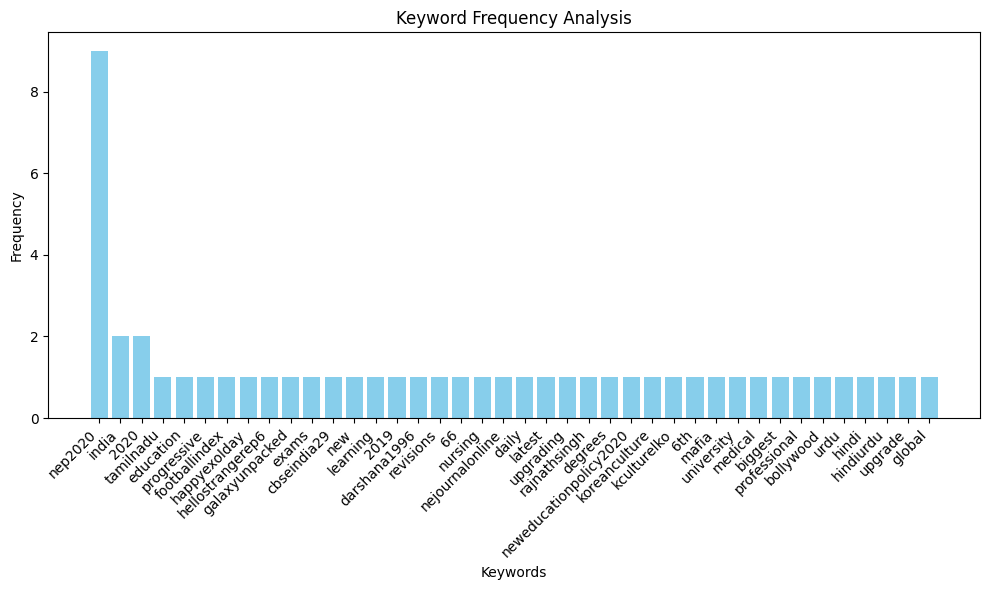

In [70]:
NEP =  [[('tamilnadu', 0.3022), ('education', 0.2944), ('progressive', 0.2927), ('india', 0.2565), ('nep2020', 0.2526)], [('footballindex', 0.5979), ('happyexolday', 0.4602), ('hellostrangerep6', 0.3227), ('galaxyunpacked', 0.3059), ('nep2020', 0.2647)], [('exams', 0.302), ('nep2020', 0.2177), ('cbseindia29', 0.2098), ('new', 0.2097), ('learning', 0.1803)], [('nep2020', 0.2386), ('2019', 0.2382), ('darshana1996', 0.164), ('revisions', 0.0899), ('66', 0.0803)], [('nursing', 0.3686), ('nep2020', 0.3248), ('nejournalonline', 0.2733), ('daily', 0.2696), ('latest', 0.2682)], [('2020', 0.314), ('upgrading', 0.2314), ('nep2020', 0.2311), ('rajnathsingh', 0.1704), ('degrees', 0.1619)], [('neweducationpolicy2020', 0.4607), ('koreanculture', 0.4196), ('nep2020', 0.3185), ('kculturelko', 0.2757), ('6th', 0.2369)], [('mafia', 0.2371), ('university', 0.1339), ('medical', 0.1134), ('biggest', 0.1015), ('professional', 0.0775)], [('bollywood', 0.6448), ('urdu', 0.5882), ('hindi', 0.5469), ('nep2020', 0.4494), ('hindiurdu', 0.4178)], [('2020', 0.3712), ('upgrade', 0.3576), ('global', 0.2971), ('nep2020', 0.2793), ('india', 0.2562)]]
TOKYO=  [[('tokyo2020', 0.8002), ('party', 0.4971), ('begin', 0.3033), ('let', 0.2087)], [('tokyo2020', 0.8535), ('congratulations', 0.3563), ('https', 0.3207)], [('olympic', 0.3968), ('tokyo', 0.3625), ('judo', 0.3607), ('japan', 0.2597), ('gold', 0.0853)], [('https', 0.3752), ('q4', 0.3204), ('britain', 0.2737), ('waller', 0.2623), ('pieterse', 0.2392)], [('tokyo2020', 0.7187), ('artisticgymnastics', 0.2577), ('https', 0.209), ('7olympics', 0.2041), ('rings', 0.1462)], [('tokyo2020', 0.4989), ('olympics', 0.3583), ('weightlifting', 0.3129), ('women', 0.1481), ('mirabaichanu', 0.0973)], [('cheer', 0.189), ('goal', 0.1731), ('goals', 0.0718), ('zambia', 0.0615), ('games', 0.027)], [('inquirerdotnet', 0.4822), ('sixth', 0.4239), ('https', 0.3873), ('ftjochoainq', 0.3808), ('rings', 0.369)], [('canada', 0.3986), ('tokyo2020', 0.367), ('scorecard', 0.2309), ('live', 0.1694), ('https', 0.1326)], [('winning', 0.4284), ('congratulations', 0.3399), ('hearty', 0.3339), ('medal', 0.3077), ('indian', 0.1795)]]
Sus_tweets= [[('switchfoot', 0.3499), ('david', 0.3448), ('http', 0.3282), ('bummer', 0.2341), ('carr', 0.2277)], [('facebook', 0.4849), ('texting', 0.3973), ('upset', 0.2519), ('update', 0.1522), ('school', 0.1355)], [('50', 0.2962), ('dived', 0.2737), ('ball', 0.2052), ('kenichan', 0.0985), ('bounds', 0.0703)], [('itchy', 0.6872), ('feels', 0.443), ('body', 0.4419), ('like', 0.3964)], [('nationwideclass', 0.7262), ('mad', 0.6603), ('behaving', 0.5192), ('ca', 0.4564)], [('kwesidei', 0.669), ('crew', 0.6574)], [('hug', 0.8851), ('need', 0.7672)], [('rains', 0.639), ('long', 0.5129), ('thanks', 0.4855), ('loltrish', 0.4358), ('fine', 0.4265)], [('nope', 1.0)], [('twittera', 0.893), ('muera', 0.6864), ('que', 0.6809)]]
Covid_tweets= [[('intoxicated', 0.6117), ('smelled', 0.5277), ('scent', 0.5257), ('sanitizers', 0.4378), ('https', 0.2836)], [('yankeespr', 0.5869), ('mlb', 0.5846), ('yankees', 0.5382), ('respects', 0.2912), ('pay', 0.2294)], [('trump', 0.4708), ('realdonaldtrump', 0.3848), ('diane3443', 0.3651), ('hoax', 0.3384), ('covid19', 0.3263)], [('brookbanktv', 0.4893), ('covid19', 0.438), ('https', 0.3979), ('gift', 0.3658), ('simple', 0.2951)], [('coronavirusupdates', 0.5359), ('covid19', 0.4761), ('july', 0.3542), ('airnewsalerts', 0.3385), ('kansalrohit69', 0.3196)], [('coronavirus', 0.2726), ('deaths', 0.206), ('bad', 0.1372), ('covid19', 0.1039), ('businesses', 0.0962)], [('covid19', 0.4682), ('recruiting', 0.4559), ('https', 0.4046), ('proactivetalent', 0.3308), ('change', 0.2995)], [('shopping', 0.6265), ('https', 0.3854), ('community', 0.3833), ('local', 0.3293), ('coverings', 0.3246)], [('health', 0.6341), ('praying', 0.611), ('recovery', 0.6057), ('chouhanshivraj', 0.4974), ('covidpositive', 0.4832)], [('pope', 0.5495), ('https', 0.5129), ('prophet', 0.4889), ('sundar', 0.4625), ('sadhu', 0.4537)]]
import matplotlib.pyplot as plt
# Create a dictionary to store keyword frequencies
data=[NEP,TOKYO,Sus_tweets,Covid_tweets]
keyword_freq = {}

# Count keyword occurrences across sublists
for sublist in NEP:
    for keyword, _ in sublist:
        if keyword in keyword_freq:
            keyword_freq[keyword] += 1
        else:
            keyword_freq[keyword] = 1

# Sort the keyword-frequency dictionary by frequency in descending order
sorted_keyword_freq = sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)

# Separate keywords and frequencies for plotting
sorted_keywords, frequencies = zip(*sorted_keyword_freq)

# Create a bar plot for keyword frequencies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(sorted_keywords, frequencies, color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Keyword Frequency Analysis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()



Category: NEP


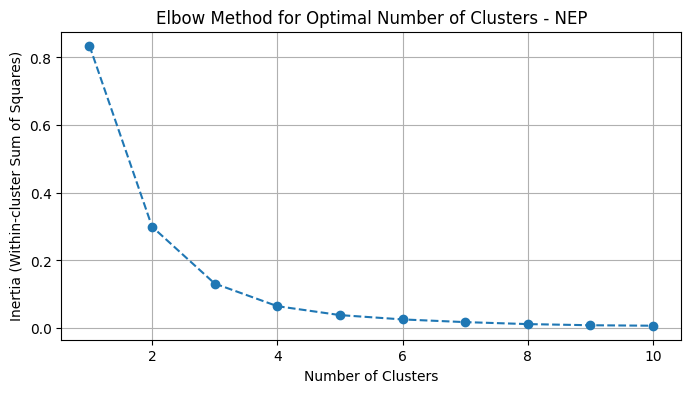

Keyword: tamilnadu, Score: 0.3022, Cluster: 0
Keyword: education, Score: 0.2944, Cluster: 0
Keyword: progressive, Score: 0.2927, Cluster: 0
Keyword: india, Score: 0.2565, Cluster: 0
Keyword: nep2020, Score: 0.2526, Cluster: 0
Keyword: footballindex, Score: 0.5979, Cluster: 0
Keyword: happyexolday, Score: 0.4602, Cluster: 0
Keyword: hellostrangerep6, Score: 0.3227, Cluster: 0
Keyword: galaxyunpacked, Score: 0.3059, Cluster: 0
Keyword: nep2020, Score: 0.2647, Cluster: 0
Keyword: exams, Score: 0.3020, Cluster: 0
Keyword: nep2020, Score: 0.2177, Cluster: 0
Keyword: cbseindia29, Score: 0.2098, Cluster: 0
Keyword: new, Score: 0.2097, Cluster: 0
Keyword: learning, Score: 0.1803, Cluster: 0
Keyword: nep2020, Score: 0.2386, Cluster: 0
Keyword: 2019, Score: 0.2382, Cluster: 0
Keyword: darshana1996, Score: 0.1640, Cluster: 0
Keyword: revisions, Score: 0.0899, Cluster: 0
Keyword: 66, Score: 0.0803, Cluster: 0
Keyword: nursing, Score: 0.3686, Cluster: 0
Keyword: nep2020, Score: 0.3248, Cluster: 0
K

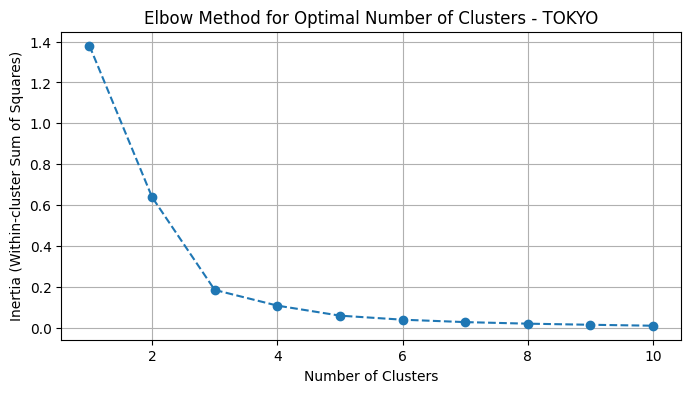

Keyword: tokyo2020, Score: 0.8002, Cluster: 0
Keyword: party, Score: 0.4971, Cluster: 0
Keyword: begin, Score: 0.3033, Cluster: 0
Keyword: let, Score: 0.2087, Cluster: 0
Keyword: tokyo2020, Score: 0.8535, Cluster: 0
Keyword: congratulations, Score: 0.3563, Cluster: 0
Keyword: https, Score: 0.3207, Cluster: 0
Keyword: olympic, Score: 0.3968, Cluster: 0
Keyword: tokyo, Score: 0.3625, Cluster: 0
Keyword: judo, Score: 0.3607, Cluster: 0
Keyword: japan, Score: 0.2597, Cluster: 0
Keyword: gold, Score: 0.0853, Cluster: 0
Keyword: https, Score: 0.3752, Cluster: 1
Keyword: q4, Score: 0.3204, Cluster: 1
Keyword: britain, Score: 0.2737, Cluster: 1
Keyword: waller, Score: 0.2623, Cluster: 1
Keyword: pieterse, Score: 0.2392, Cluster: 1
Keyword: tokyo2020, Score: 0.7187, Cluster: 0
Keyword: artisticgymnastics, Score: 0.2577, Cluster: 0
Keyword: https, Score: 0.2090, Cluster: 0
Keyword: 7olympics, Score: 0.2041, Cluster: 0
Keyword: rings, Score: 0.1462, Cluster: 0
Keyword: tokyo2020, Score: 0.4989, C

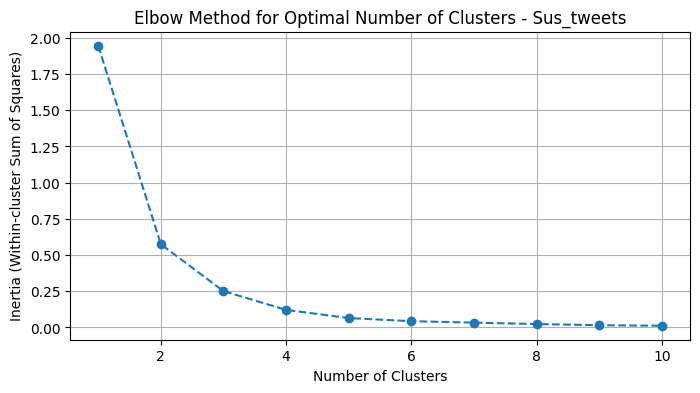

Keyword: switchfoot, Score: 0.3499, Cluster: 1
Keyword: david, Score: 0.3448, Cluster: 1
Keyword: http, Score: 0.3282, Cluster: 1
Keyword: bummer, Score: 0.2341, Cluster: 1
Keyword: carr, Score: 0.2277, Cluster: 1
Keyword: facebook, Score: 0.4849, Cluster: 1
Keyword: texting, Score: 0.3973, Cluster: 1
Keyword: upset, Score: 0.2519, Cluster: 1
Keyword: update, Score: 0.1522, Cluster: 1
Keyword: school, Score: 0.1355, Cluster: 1
Keyword: 50, Score: 0.2962, Cluster: 1
Keyword: dived, Score: 0.2737, Cluster: 1
Keyword: ball, Score: 0.2052, Cluster: 1
Keyword: kenichan, Score: 0.0985, Cluster: 1
Keyword: bounds, Score: 0.0703, Cluster: 1
Keyword: itchy, Score: 0.6872, Cluster: 1
Keyword: feels, Score: 0.4430, Cluster: 1
Keyword: body, Score: 0.4419, Cluster: 1
Keyword: like, Score: 0.3964, Cluster: 1
Keyword: nationwideclass, Score: 0.7262, Cluster: 1
Keyword: mad, Score: 0.6603, Cluster: 1
Keyword: behaving, Score: 0.5192, Cluster: 1
Keyword: ca, Score: 0.4564, Cluster: 1
Keyword: kwesidei

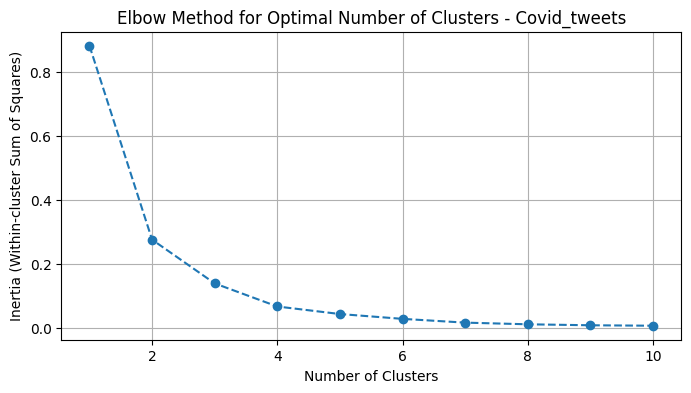

Keyword: intoxicated, Score: 0.6117, Cluster: 1
Keyword: smelled, Score: 0.5277, Cluster: 1
Keyword: scent, Score: 0.5257, Cluster: 1
Keyword: sanitizers, Score: 0.4378, Cluster: 1
Keyword: https, Score: 0.2836, Cluster: 1
Keyword: yankeespr, Score: 0.5869, Cluster: 1
Keyword: mlb, Score: 0.5846, Cluster: 1
Keyword: yankees, Score: 0.5382, Cluster: 1
Keyword: respects, Score: 0.2912, Cluster: 1
Keyword: pay, Score: 0.2294, Cluster: 1
Keyword: trump, Score: 0.4708, Cluster: 1
Keyword: realdonaldtrump, Score: 0.3848, Cluster: 1
Keyword: diane3443, Score: 0.3651, Cluster: 1
Keyword: hoax, Score: 0.3384, Cluster: 1
Keyword: covid19, Score: 0.3263, Cluster: 1
Keyword: brookbanktv, Score: 0.4893, Cluster: 1
Keyword: covid19, Score: 0.4380, Cluster: 1
Keyword: https, Score: 0.3979, Cluster: 1
Keyword: gift, Score: 0.3658, Cluster: 1
Keyword: simple, Score: 0.2951, Cluster: 1
Keyword: coronavirusupdates, Score: 0.5359, Cluster: 0
Keyword: covid19, Score: 0.4761, Cluster: 0
Keyword: july, Score

In [73]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the categories and their respective data
categories = ["NEP", "TOKYO", "Sus_tweets", "Covid_tweets"]
category_data = [NEP, TOKYO, Sus_tweets, Covid_tweets]

# Perform clustering analysis for each category
for i, category in enumerate(categories):
    print(f"Category: {category}")
    category_keywords = category_data[i]

    # Extract importance scores for each keyword in the category
    scores = []
    for sublist in category_keywords:
        scores.extend([score for _, score in sublist])

    # Convert scores to a NumPy array
    scores_array = np.array(scores).reshape(-1, 1)

    # Determine the optimal number of clusters using the Elbow method
    inertia = []
    for n_clusters in range(1, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(scores_array)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow curve to choose the optimal number of clusters
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Within-cluster Sum of Squares)')
    plt.title(f'Elbow Method for Optimal Number of Clusters - {category}')
    plt.grid(True)
    plt.show()

    # Based on the Elbow curve, choose an optimal number of clusters (e.g., 2 or 3)
    # You can visually inspect the plot to determine the "elbow point"

    # Perform K-Means clustering with the chosen number of clusters
    n_clusters = 2  # You can adjust this based on the Elbow curve or domain knowledge
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scores_array)

    # Assign cluster labels to each keyword based on their scores
    cluster_labels = kmeans.labels_

    # Print cluster labels for each keyword
    for j, sublist in enumerate(category_keywords):
        for keyword, score in sublist:
            print(f'Keyword: {keyword}, Score: {score:.4f}, Cluster: {cluster_labels[j]}')

    print("\n")


Category: NEP


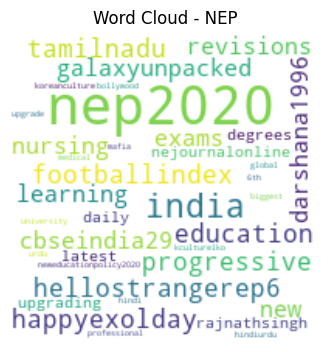

Category: TOKYO


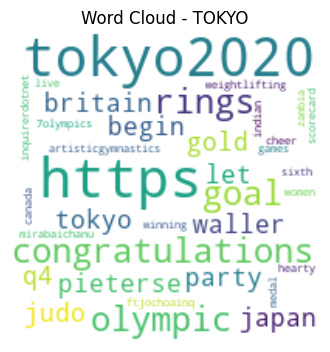

Category: Sus_tweets


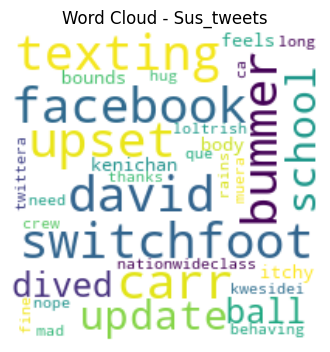

Category: Covid_tweets


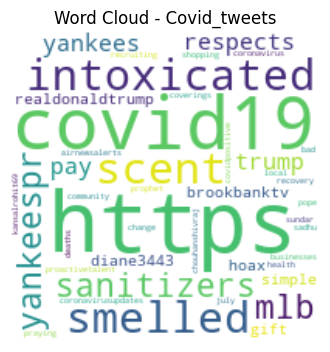

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the categories and their respective data
categories = ["NEP", "TOKYO", "Sus_tweets", "Covid_tweets"]
category_data = [NEP, TOKYO, Sus_tweets, Covid_tweets]

# Create word clouds for each category
for i, category in enumerate(categories):
    print(f"Category: {category}")
    category_keywords = category_data[i]

    # Extract keywords from the category data
    keywords = [keyword for sublist in category_keywords for keyword, _ in sublist]

    # Convert keywords to a space-separated string
    keyword_text = " ".join(keywords)

    # Generate a word cloud
    wordcloud = WordCloud(width=200, height=200, background_color="white").generate(keyword_text)

    # Plot the word cloud
    plt.figure(figsize=(4, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud - {category}")
    plt.axis("off")
    plt.show()
